In [372]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

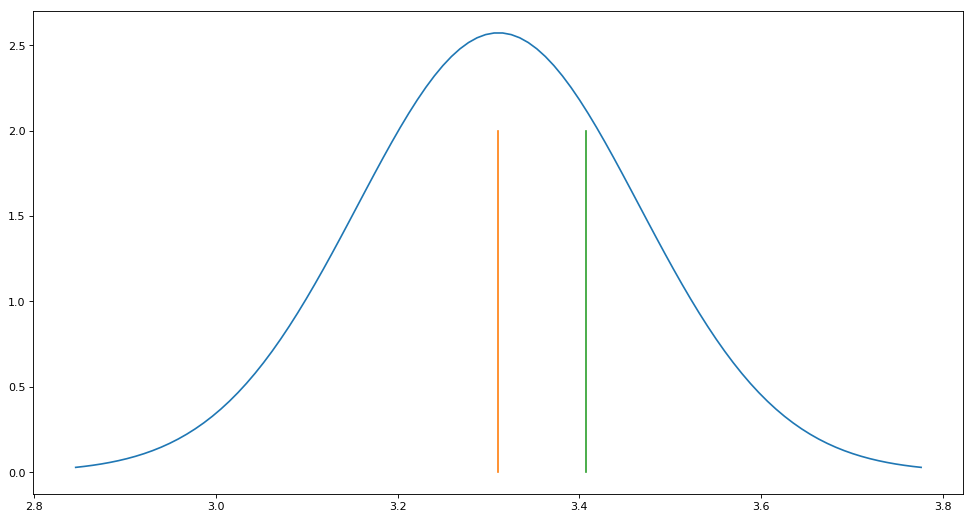

In [373]:
ph_sample = np.array([3.41, 3.51, 3.39, 3.11, 3.21, 3.50, 3.46, 3.37, 3.71])

x_ = ph_sample.mean() # Gemiddelde van de steekproef
n = len(ph_sample) # Grootte steekproef
s = ph_sample.std()

population = 2060
sigma = 0.155111 # Standaard deviatie van de populatie
mu = 3.310869 # Gemiddlede van de populatie

alpha = 0.05 # 95% betrouwbaarheid
se = sigma / np.sqrt(n) # standard error using sigma of population, since its available

# plot de normaalverdeling met gemiddelde populatie en steekproef
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(15,8), dpi=80)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot([mu,mu],[0,2]) # gemiddelde populatie
plt.plot([x_,x_],[0,2]) # gemiddelde steekproef
plt.show()

__Hypotheses__

Nul Hypothese (H0):

_Er is geen significant verschil te vinden tussen de gemiddelde PH waardes van de steekproef en de populatie. Dat wil zeggen, als Z > -1.960 or if Z < 1.960_


Alternatieve Hypothese (H1):

_Er is wel een significant verschil tussen gemiddelde PH waardes van de steekproef en de populatie. Dat wil zeggen, als Z < -1.960 or if Z > 1.960_ 

Toetszijde:

_Het gaat om onzijdig (beide zijdes) toetsen, aangezien we een significant verschil zoeken, een verschil kan zowel aan de lage kant als aan de hoge kant zitten._

In [375]:
z_score_left = ((x_ - mu) / se) * -1
z_score_right = (x_ - mu) / se
z_score_percent_left = stats.norm.pdf(z_score_left)
z_score_percent_right = stats.norm.pdf(z_score_right)
grens_ph_sample_left = z_score_left * se + mu
grens_ph_sample_right = z_score_right * se + mu

print("Z Score Steekproef links:\n", z_score_left)
print("Z Score Steekproef rechts:\n", z_score_right)
print("Grens in procenten volgens Z tabel links:\n", round((z_score_percent_left) * 100, 2))
print("Grens in procenten volgens Z tabel rechts:\n", round((1 - z_score_percent_right) * 100, 2))
print("Grens in PH waarde links:\n", grens_ph_sample_left)
print("Grens in PH waarde rechts:\n", grens_ph_sample_right)
print()

z_grens_left = stats.norm.ppf((alpha / 2)) # 2 zijdig 0.025 
z_grens_right = stats.norm.ppf((1 - alpha / 2)) # 2 zijdig 0.975
z_grens_percent_left = stats.norm.pdf(z_grens_left)
z_grens_percent_right = stats.norm.pdf(z_grens_right)
grens_ph_alpha_left = z_grens_left * se + mu
grens_ph_alpha_right = z_grens_right * se + mu


print("Z Score van grens betrouwbaarheid 2,5% links:\n", z_grens_left)
print("Z Score van grens betrouwbaarheid 97,5% rechts:\n", z_grens_right)
print("Grens in procenten volgens Z tabel links:\n", round((z_grens_percent_left) * 100, 2))
print("Grens in procenten volgens Z tabel rechts:\n", round((1 - z_grens_percent_right) * 100, 2))
print("Grens in PH waarde links:\n", grens_ph_alpha_left)
print("Grens in PH waarde rechts:\n", grens_ph_alpha_right)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(15,8), dpi=80)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='green')
plt.plot([grens_ph_sample_left,grens_ph_sample_left],[0,2],color='blue')
plt.plot([grens_ph_sample_right,grens_ph_sample_right],[0,2],color='blue')
plt.plot([grens_ph_alpha_left,grens_ph_alpha_left],[0,2],color='red')
plt.plot([grens_ph_alpha_right,grens_ph_alpha_right],[0,2],color='red')
plt.show()

Z Score Steekproef links:
 -1.8743115145498033
Z Score Steekproef rechts:
 1.8743115145498033
Grens in procenten volgens Z tabel links:
 6.89
Grens in procenten volgens Z tabel rechts:
 93.11
Grens in PH waarde links:
 3.2139602222222217
Grens in PH waarde rechts:
 3.407777777777778

Z Score van grens betrouwbaarheid 2,5% links:
 -1.9599639845400545
Z Score van grens betrouwbaarheid 97,5% rechts:
 1.959963984540054
Grens in procenten volgens Z tabel links:
 5.84
Grens in procenten volgens Z tabel rechts:
 94.16
Grens in PH waarde links:
 3.209531675464669
Grens in PH waarde rechts:
 3.4122063245353305


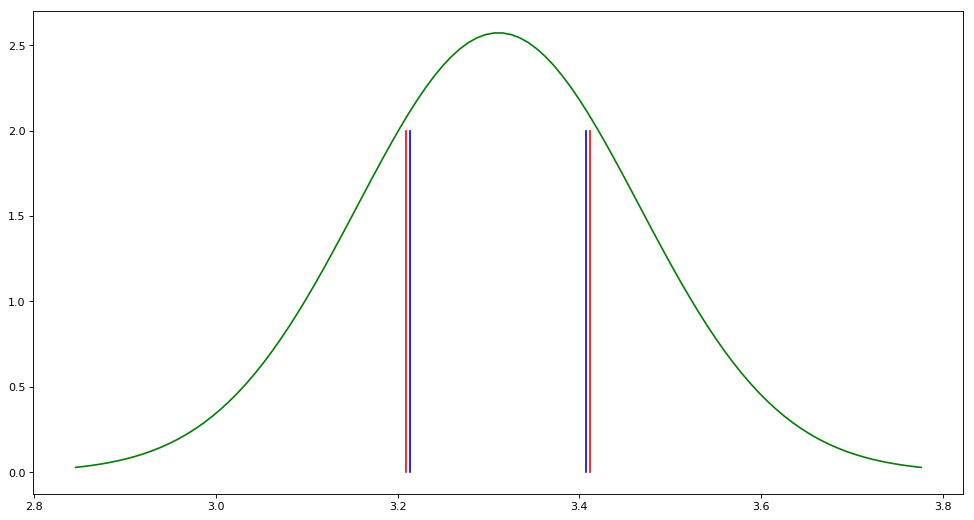

__Conclusie:__

De alternatieve hypothese (H1) vervalt omdat er is geen significant verschil tussen de gemiddelde PH waarde van de steekproef en de populatie is. Zoals is uitgebeeld in het plaatje, valt de 95% van de steekproef data (sample) binnen de 95% van de gehele populatie. Alternatieve Hypothese (H1) vervalt.